In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# QUESTION 1 : 

In [ ]:
# Lecture du CSV
csvfile = "FAOSTAT_2013_population.csv"
df_population = pd.read_csv(csvfile)

dimension = df_population.columns
nb_lignes, nb_colonnes = df_population.shape
print("\nLes données sont classées par :\n", dimension)
print ("\nNombre de lignes :", nb_lignes)
print ("Nombre de colonnes :", nb_colonnes)
print(df_population.dtypes)


Les données sont classées par :
 Index(['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

Nombre de lignes : 175
Nombre de colonnes : 14
Domain Code         object
Domain              object
Country Code         int64
Country             object
Element Code         int64
Element             object
Item Code            int64
Item                object
Year Code            int64
Year                 int64
Unit                object
Value                int64
Flag                object
Flag Description    object
dtype: object


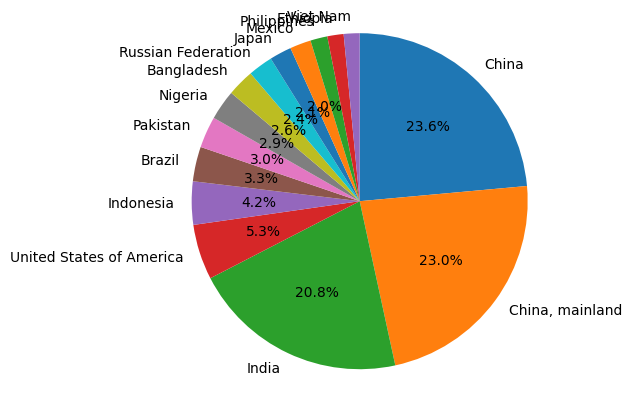

In [ ]:
# Population de chaque pays

dfplot = df_population[df_population['Value'] >= 4].sort_values(by=['Value'], ascending=False)
dfplot = dfplot.head(15)

labels = dfplot['Country']
sizes = dfplot['Value']

def cautopct(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=cautopct,
        shadow=False, startangle=90, counterclock=False)
ax1.axis('equal')

plt.show()

In [ ]:
#calcul de la population mondiale

popSum = df_population['Value']
popSum.sum()*1000

8413993000

In [ ]:
df_population

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,30552,NaN,Official data
1,FBS,Food Balance Sheets,3,Albania,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,3173,NaN,Official data
2,FBS,Food Balance Sheets,4,Algeria,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,39208,NaN,Official data
3,FBS,Food Balance Sheets,7,Angola,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,21472,NaN,Official data
4,FBS,Food Balance Sheets,8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,90,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,FBS,Food Balance Sheets,237,Viet Nam,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,91680,NaN,Official data
171,FBS,Food Balance Sheets,249,Yemen,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,24407,NaN,Official data
172,FBS,Food Balance Sheets,251,Zambia,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14539,NaN,Official data
173,FBS,Food Balance Sheets,181,Zimbabwe,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14150,NaN,Official data


## Critique du résultat

Nous avons utilisé le Dataset de la Population Mondiale de chaque pays en 2013 pour déterminer le nombre total d'être humain lors de cette année. Le résultat que l'on obtient est 8 413 993 000. Suite à quelques recherches sur internet on observe que le résultat est exagéré (7,229 milliards d'après google) on a un écart environ de 1 184 993 000. on a donc un surplus de valeur au sein de notre Dataset

## Recherche de l'anomalie

Penchons nous dans notre Dataset. On remarque facilement une répétition dans la colonne Country. le string "China" ressort plusieurs fois : 

In [ ]:
#on recherche les répétitions du string 'China'
country = df_population['Country']
for i in range(len(country)):
    if 'China' in country[i]:
        print(country[i])

China, Hong Kong SAR
China, Macao SAR
China, mainland
China, Taiwan Province of
China


On observe que la Chine est comptabilisé deux fois : 

- Séparé en Quatre provinces ( Hong Kong SAR, Macao SAR, mainland, Taiwan Province of)

- et une Chine qui les regroupe toutes.

Cependant si on se penchent sur les deux dernières colonnes "Flag" et "Flag Description", on remarque une anomalie. la colonne "Flag retourne aucune valeur si ce sont des valeurs officiels comme on le voit dans la colonne "Flag description". Cependant on aperçoit au niveau de la dernière ligne, une valeur "A" est renseigné  dans la colonne "Flag" et si on se renseigne au niveau de la colonne "Flag Description" on observe la valeur suivante : "Aggregate, may include official, semi-official, estimated or calculated data". 

In [ ]:
#recherche de l'anomalie
df_population.iloc[-1,[11,12,13]]

Value                                                         1416667
Flag                                                                A
Flag Description    Aggregate, may include official, semi-official...
Name: 174, dtype: object

## Correction du résultat

Afin de corriger le résultat, plusieurs solution s'offre à nous :

- On peut faire la somme de la population et la soustraire à la population de l'anomalie 

- On peut supprimer simplement la dernière ligne si elle n'est tout simplement pas utile 

 Pour cela nous devons comparer le résultat des sommes des quatre provinces à l'anomalie 

In [ ]:
#iteration pour récupérer les 4 provinces et sommes de la population de ces dernières.
result = 0
for i in range(len(country)):
    if 'China' in country[i] and country[i] != 'China':
       result = result + popSum[i]
print(result)

#comparaison entre le résultat et l'anomalie
if result == popSum.iloc[-1]:
    print("il y a bien un doublon")

1416667
il y a bien un doublon


Lorsqu'on compare les résultats on remarque qu'il y a bien un doublon. On peut donc se permettre d'effectuer la première option et ainsi on supprime la ligne de l'anomalie 

In [ ]:
#paolo
for i in range(len(df_population["Flag"])):
    if not pd.isna(df_population["Flag"][i]):
        df_population.drop(i,inplace=True)

df_population.iloc[-1]

Domain Code                                   FBS
Domain                        Food Balance Sheets
Country Code                                  181
Country                                  Zimbabwe
Element Code                                  511
Element             Total Population - Both sexes
Item Code                                    2501
Item                                   Population
Year Code                                    2013
Year                                         2013
Unit                                 1000 persons
Value                                       14150
Flag                                          NaN
Flag Description                    Official data
Name: 173, dtype: object

Maintenant qu'on supprimer l'anomalie, il nous qu'à recalculer la population mondiale 

In [ ]:
#Calcul de la population mondiale
NewSumPopMondiale = df_population['Value'].sum()*1000
print(f"La somme de la population mondiale en 2013 est de : {NewSumPopMondiale}")

La somme de la population mondiale en 2013 est de : 6997326000


La population mondiale d'après le dataset est de  6 997 326 000 d'habitant dans le monde en 2013. Il y a toujours un écart avec les données sur internet, cependant l'écart s'est largement amoindrit et donc le résultat est beaucoup plus précis 

# 

# Question 2 : 

In [ ]:
#lecture du CSV
csvfile2 = "FAOSTAT_2013_cereal.csv"
dfc = pd.read_csv(csvfile2)
dfcf = dfc.loc[dfc['Produit'].str.contains('Blé')].loc[dfc['Symbole'].str.contains('S')]
dfcf



,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées
2,FBS,Bilans Alimentaires,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées
3,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées
4,FBS,Bilans Alimentaires,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,FBS,Bilans Alimentaires,181,Zimbabwe,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,456.0,S,Données standardisées
15828,FBS,Bilans Alimentaires,181,Zimbabwe,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,1.0,S,Données standardisées
15829,FBS,Bilans Alimentaires,181,Zimbabwe,5123,Pertes,2511,Blé,2013,2013,Milliers de tonnes,11.0,S,Données standardisées
15830,FBS,Bilans Alimentaires,181,Zimbabwe,5131,Traitement,2511,Blé,2013,2013,Milliers de tonnes,1.0,S,Données standardisées


In [ ]:
valeurs = dfc['Valeur']

valeurs.dtypes
(valeurs)
type(valeurs)
valeurs

#production = exportation + disponibilité intérieur - importation - variation de stock = exportation + (Nourriture + autre + traitement + pertes + semences + Aliment pour animaux) - importation - variation de stock


#redondance = production et disponibilité intérieur
#38614+2055+1131=748+21502+20298=7822+358+1575+2824+6971


0        5169.00
1        1173.00
2        -350.00
3        5992.00
4         322.00
          ...   
16052     405.00
16053       0.29
16054       2.00
16055       0.06
16056       0.01
Name: Valeur, Length: 16057, dtype: float64

In [ ]:
for pays in dfc['Pays'].unique():
    country                   = dfc.loc[dfc['Pays']==pays]
    ble                       = country.loc[country['Produit'].str.contains('Blé')]
    production                = ble.loc[dfc['Élément'].str.contains('Production')].Valeur
    importation               = ble.loc[dfc['Élément'].str.contains('Importations - Quantité')].Valeur
    exportation               = ble.loc[dfc['Élément'].str.contains('Exportations - Quantité')].Valeur
    varStock                  = ble.loc[dfc['Élément'].str.contains('Variation de stock')].Valeur
    dispoInterieur            = ble.loc[dfc['Élément'].str.contains('Disponibilité intérieure')].Valeur
    alimAnimaux               = ble.loc[dfc['Élément'].str.contains('Aliments pour animaux')].Valeur
    semences                  = ble.loc[dfc['Élément'].str.contains('Semences')].Valeur
    pertes                    = ble.loc[dfc['Élément'].str.contains('Pertes')].Valeur
    traitement                = ble.loc[dfc['Élément'].str.contains('Traitement')].Valeur
    autreUser                 = ble.loc[dfc['Élément'].str.contains('Autres Utilisations')].Valeur
    nourriture                = ble.loc[dfc['Élément'].str.contains('Nourriture')].Valeur
    


    #production    = production[0] if production.shape else 0
    try: 
        production = production.values[0]
    except IndexError:
        production = 0
    try:
        importation = importation.values[0]
    except IndexError:
        importation = 0
    try: 
        exportation = exportation.values[0]
    except IndexError:
        exportation = 0
    try:
        varStock = varStock.values[0]
    except IndexError:
        varStock = 0
    try: 
        dispoInterieur = dispoInterieur.values[0]
    except IndexError:
        dispoInterieur = 0
    try:
        alimAnimaux = alimAnimaux.values[0]
    except IndexError:
        alimAnimaux = 0
    
    try:
        semences = semences.values[0]
    except IndexError:
        semences = 0
    try:
        pertes = pertes.values[0]
    except IndexError:
        pertes = 0
    try:
        traitement = traitement.values[0]
    except IndexError:
        traitement = 0
    try: 
        autreUser = autreUser.values[0]
    except IndexError:
        autreUser = 0
    try:
        nourriture = nourriture.values[0]
    except IndexError:
        nourriture = 0
    
    if production != 0 :
      print(pays,'Production :',production)
    if importation != 0:
      print(pays,'importation :',importation)
    if exportation != 0:
      print(pays,'exportation :',exportation)
    if varStock != 0:
      print(pays,'variation du stock :',varStock)
    if dispoInterieur != 0:
      print(pays,'disponibilité interieur :',dispoInterieur)
    if alimAnimaux != 0:
      print(pays,'alimentation animale :',alimAnimaux)
    if semences != 0:
      print(pays,'semences :',semences)
    if pertes != 0:
      print(pays,'pertes :',pertes)
    if traitement != 0:
      print(pays,'traitement :',traitement)
    if autreUser != 0:
      print(pays,'autre utilisation :',autreUser)
    if nourriture != 0:
      print(pays,'nourriture :',nourriture)

    print("---------------------")
    print(int(production))
    print(int(exportation + dispoInterieur - importation - varStock))
    print(int(exportation + (nourriture + autreUser + traitement + pertes + semences + alimAnimaux) - importation - varStock))
     

#production = exportation + disponibilité intérieur - importation - variation de stock = exportation + (Nourriture + autre + traitement + pertes + semences + Aliment pour animaux) - importation - variation de stock

   


Lesotho nourriture : 109.0
---------------------
13
14
13
Lettonie Production : 1435.0
Lettonie importation : 260.0
Lettonie exportation : 1192.0
Lettonie variation du stock : -158.0
Lettonie disponibilité interieur : 345.0
Lettonie alimentation animale : 69.0
Lettonie semences : 95.0
Lettonie pertes : 13.0
Lettonie traitement : 20.0
Lettonie nourriture : 148.0
---------------------
1435
1435
1435
l'ex-République yougoslave de Macédoine Production : 259.0
l'ex-République yougoslave de Macédoine importation : 148.0
l'ex-République yougoslave de Macédoine exportation : 32.0
l'ex-République yougoslave de Macédoine variation du stock : 4.0
l'ex-République yougoslave de Macédoine disponibilité interieur : 379.0
l'ex-République yougoslave de Macédoine alimentation animale : 20.0
l'ex-République yougoslave de Macédoine semences : 21.0
l'ex-République yougoslave de Macédoine pertes : 33.0
l'ex-République yougoslave de Macédoine autre utilisation : 84.0
l'ex-République yougoslave de Macédoine n

In [ ]:
dflist = dfc['Valeur'].tolist()
type(dflist)

list

In [ ]:
def locelement(a, b):
    test123 = dfc.loc[dfc[a].str.contains(b)].Valeur
    test123_zero = test123[test123 != 0]
    return test123_zero

print(locelement('Élément', 'Exportations - Quantité'))




#for pays in dfc['Pays'].unique():
#    cdt = dfc.loc[(dfc['Pays'] == pays) & (dfc['Produit'].str.contains('Blé'))]
#
#    production = cdt.loc[cdt['Élément'].str.contains('Production'), 'Valeur'].values
#   importation = cdt.loc[cdt['Élément'].str.contains('Importations - Quantité'), 'Valeur'].values
#    exportation = cdt.loc[cdt['Élément'].str.contains('Exportations - Quantité'), 'Valeur'].values
#
#    production = production[0] if production.size else 0
#    importation = importation[0] if importation.size else 0
#    
#    if production != 0:
#        print(pays, production, importation)

64        495.0
78        163.0
91          8.0
104      3036.0
132         4.0
          ...  
15979     252.0
16007       4.0
16020      13.0
16033      17.0
16047     104.0
Name: Valeur, Length: 622, dtype: float64


## Question 3 :

In [ ]:
# Lecture du CSV
dfvegetal = pd.read_csv("FAOSTAT_2013_vegetal.csv")
dfvegetal.insert(14,'dfCode','Vegetal')
dfanimal  = pd.read_csv("FAOSTAT_2013_animal.csv")
dfanimal.insert(14,'dfCode','Animal')

for i in range(len(dfvegetal['Pays'])):
    if dfvegetal["Code Pays"][i] == 351:
         dfvegetal.drop(i,inplace=True)

for i in range(len(dfanimal['Pays'])):
    if dfanimal["Code Pays"][i] == 351:
         dfanimal.drop(i,inplace=True)



# Input demande pays voulu

pays_voulu = 2 #int(input("Entrez un code pays : "))

# Les CSV étant en deux langues différentes on utilise une variable pour
# localiser les pays en fonction de leur code pays qui restent eux inchangés

traductionpays = str(dfanimal.loc[dfanimal['Code Pays'] == pays_voulu, 'Pays'].unique()).replace('[',' ').replace(']',' ').replace("'","")
 
# Codes voulus pour l'exercices

code_element_kcal = 664
code_element_proteine = 674
code_element_kg = 645

# Concat des CSV, le CSV cereal et vegetal contenant des lignes ou le code élément 664 et 674
# sont présents vont créer une nouvelle df 

dffinal = pd.concat([dfvegetal[dfvegetal["Code Élément"].isin([664,674,645,5301,5123,5521,5911,5611,5142,5154])],dfanimal[dfanimal["Code Élément"].isin([664,674,645,5301,5123,5521,5911])]], join = "inner")

# Résulat demandé avec le concat en fonction du code pays demandé

resultatdfdf = dffinal[dffinal['Code Pays'] == pays_voulu]

# Réponses
# Donc ici si un code pays correspond à un pays dans les CSV on affiche sa data frame triée
# en ordre alphabétique et par code produit croissant, dans le cas ou le code pays est éronné
# on affiche la nouvelle DataFrame au complet triée de la même façon

if pays_voulu in df_population['Country Code'].values:
    donnees_pays = df_population[df_population['Country Code'] == pays_voulu]['Value'].values[0]*1000
    print(f"Le nombre d'habitants en {traductionpays} est : {donnees_pays}")
    print(resultatdfdf.sort_values(by=['Code Élément','Pays']))
else:
    print(f"Le pays {pays_voulu} n'a pas été trouvé dans les données.")
    print(dffinal.sort_values(by=['Code Élément','Pays']))

Le nombre d'habitants en  Afghanistan  est : 30552000
    Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
7            FBS  Bilans Alimentaires          2  Afghanistan           645   
17           FBS  Bilans Alimentaires          2  Afghanistan           645   
29           FBS  Bilans Alimentaires          2  Afghanistan           645   
41           FBS  Bilans Alimentaires          2  Afghanistan           645   
50           FBS  Bilans Alimentaires          2  Afghanistan           645   
..           ...                  ...        ...          ...           ...   
294          FBS  Bilans Alimentaires          2  Afghanistan          5911   
305          FBS  Bilans Alimentaires          2  Afghanistan          5911   
334          FBS  Bilans Alimentaires          2  Afghanistan          5911   
344          FBS  Bilans Alimentaires          2  Afghanistan          5911   
73           FBS  Bilans Alimentaires          2  Afghanistan          5911  

## Question 4 : Ratio énergie/poids

A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un Oeuf.

In [ ]:
# Sélectionne les colonnes nécessaires

df_new = dffinal[['Pays','Code Pays', 'Produit', 'Code Élément','Élément', 'Code Produit','Unité', 'Valeur','dfCode']]

# Filtre les lignes où le Code Élément est égal à 664 et 674

df_664 = df_new[df_new['Code Élément'] == 664] #kcal
df_645 = df_new[df_new['Code Élément'] == 645] #dispo alim
df_674 = df_new[df_new['Code Élément'] == 674] #proteines


# Filtre les lignes dont la valeur est zéro pour éviter une potentielle division par zéro
df_645 = df_645[df_645['Valeur'] > 0]
df_645['Valeur'] = df_645['Valeur']/365
df_674['Valeur'] = df_674['Valeur']/1000
# Fusionne les DataFrames df_664 et df_674 sur les colonnes 'Pays' et 'Produit'
df_kcal  = pd.merge(df_664, df_645, on=['Pays','Code Pays', 'Produit', 'Code Produit','dfCode'])
df_proteine  = pd.merge(df_674, df_645, on=['Pays','Code Pays', 'Produit', 'Code Produit','dfCode'])
#Calcule le rapport entre les valeurs de la colonne 'Valeur_x' et 'Valeur_y'
df_proteine["proteine/Kg"] = df_proteine['Valeur_x'] / df_proteine['Valeur_y']
df_kcal['Kcal/Kg'] = df_kcal['Valeur_x'] / df_kcal['Valeur_y']

df_merged = pd.merge(df_kcal, df_proteine, on=['Pays','Code Pays', 'Produit', 'Code Produit','dfCode'])
dfquestion4 = df_merged[['Pays','Code Pays', 'Produit', 'Code Produit', 'Kcal/Kg','proteine/Kg','dfCode']]
dfquestion4

/tmp/ipykernel_2234/1174792727.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_674['Valeur'] = df_674['Valeur']/1000


,Pays,Code Pays,Produit,Code Produit,Kcal/Kg,proteine/Kg,dfCode
0,Afghanistan,2,Blé,2511,3118.548337,0.084080,Vegetal
1,Afghanistan,2,Riz (Eq Blanchi),2805,3723.950796,0.071310,Vegetal
2,Afghanistan,2,Orge,2513,3250.000000,0.098750,Vegetal
3,Afghanistan,2,Maïs,2514,3066.000000,0.081760,Vegetal
4,Afghanistan,2,Millet,2517,2737.500000,0.073000,Vegetal
...,...,...,...,...,...,...,...
10058,Zimbabwe,181,Poissons Eau Douce,2761,712.195122,0.110390,Animal
10059,Zimbabwe,181,Perciform,2762,0.000000,0.000000,Animal
10060,Zimbabwe,181,Poissons Pelagiques,2763,588.709677,0.111855,Animal
10061,Zimbabwe,181,"Poissons Marins, Autres",2764,0.000000,0.091250,Animal


In [ ]:
df_RatioVegAnimal        = dfquestion4
df_RatioVegAnimal        = df_RatioVegAnimal.groupby(["Produit","dfCode"], as_index = False ).mean()
dfquestion4
df_RatioVegAnimal        = df_RatioVegAnimal.drop(['Code Pays','Code Produit'], axis = 1)

In [ ]:
df_RatioVegAnimal[(df_RatioVegAnimal['Produit'] == 'Oeufs')]['Kcal/Kg'].mean()

1364.8177721733775

## Question 5 : Aliments les plus caloriques et protéiques

En considérant les aliments végétaux et animaux, citez cinq aliments parmi les vingt aliments les plus caloriques, en utilisant le ratio énergie/poids. Citez cinq aliments parmi les vingt aliments les plus riches en protéines.

In [ ]:
#citez cinq aliments les plus caloriques
df_RatioVegAnimal.dropna().sort_values(by=['Kcal/Kg'], ascending=False)[:5]

,Produit,dfCode,Kcal/Kg,proteine/Kg
41,Huile de Sésame,Vegetal,9559.523810,0.000000
36,Huile de Germe de Maïs,Vegetal,8950.891229,0.001908
33,Huile d'Olive,Vegetal,8774.038462,0.000000
42,Huile de Tournesol,Vegetal,8769.634357,0.001316
39,Huile de Soja,Vegetal,8737.921301,0.002016


In [ ]:
df_RatioVegAnimal.dropna().sort_values(by=['proteine/Kg'], ascending=False)[:5]

,Produit,dfCode,Kcal/Kg,proteine/Kg
78,Soja,Vegetal,1776.845959,0.253382
5,Arachides Decortiquees,Vegetal,5466.324644,0.247908
67,Pois,Vegetal,3128.831884,0.221081
48,Légumineuses Autres,Vegetal,3170.465864,0.220259
29,Haricots,Vegetal,3278.309310,0.217191


## Question 6 : Dispo. intérieure mondiale des végétaux

Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [ ]:
df_5301   = df_new[df_new['Code Élément'] == 5301].groupby(['Produit','Unité'], as_index=False).sum()
df_5301

,Produit,Unité,Code Pays,Code Élément,Code Produit,Valeur
0,Abats Comestible,Milliers de tonnes,21825,922374,476064,17587.0
1,"Agrumes, Autres",Milliers de tonnes,20116,848160,418240,12176.0
2,"Alcool, non Comestible",Milliers de tonnes,20111,848160,425440,21741.0
3,Aliments pour enfants,Milliers de tonnes,21379,906471,458280,84.0
4,Ananas,Milliers de tonnes,21118,890568,439824,23282.0
...,...,...,...,...,...,...
92,Viande de Suides,Milliers de tonnes,21705,911772,470076,112547.0
93,Viande de Volailles,Milliers de tonnes,21825,922374,475716,106975.0
94,"Viande, Autre",Milliers de tonnes,21825,922374,475890,6809.0
95,Vin,Milliers de tonnes,21591,911772,456660,27316.0


In [ ]:
df_5301                        = df_new[df_new['Code Élément'] == 5301].groupby('Produit').sum()
df_mergedVeg                   = pd.merge(df_RatioVegAnimal,df_5301,on = ["Produit"])
#Calcule le rapport entre les valeurs de la colonne 'Valeur_x' et 'Valeur_y'
dfquestion6                    = df_mergedVeg
dfquestion6                    = dfquestion6[dfquestion6["dfCode"] =='Vegetal']
dfquestion6['Valeur']          = dfquestion6['Valeur']*1000000
dfquestion6['Kcal']            = dfquestion6['Valeur'] * dfquestion6['Kcal/Kg']
dfquestion6['proteine']        = dfquestion6['Valeur'] * dfquestion6['proteine/Kg']
 

/tmp/ipykernel_2234/2753422693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquestion6['Valeur']          = dfquestion6['Valeur']*1000000
/tmp/ipykernel_2234/2753422693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquestion6['Kcal']            = dfquestion6['Valeur'] * dfquestion6['Kcal/Kg']
/tmp/ipykernel_2234/2753422693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
dfquestion6

,Produit,dfCode,Kcal/Kg,proteine/Kg,Code Pays,Code Élément,Code Produit,Valeur,Kcal,proteine
1,"Agrumes, Autres",Vegetal,85.941442,0.001876,20116,848160,418240,1.217600e+10,1.046423e+12,2.284324e+07
2,Aliments pour enfants,Vegetal,3050.469022,0.148726,21379,906471,458280,8.400000e+07,2.562394e+11,1.249300e+07
3,Ananas,Vegetal,350.683025,0.002236,21118,890568,439824,2.328200e+10,8.164602e+12,5.204764e+07
5,Arachides Decortiquees,Vegetal,5466.324644,0.247908,21372,901170,434520,2.969500e+10,1.623225e+14,7.361633e+09
6,Avoine,Vegetal,1819.000640,0.079773,20837,879966,417656,2.340700e+10,4.257735e+13,1.867248e+09
...,...,...,...,...,...,...,...,...,...,...
83,Sésame,Vegetal,5152.750977,0.178281,19209,821655,396955,4.243000e+09,2.186312e+13,7.564477e+08
84,Thé,Vegetal,188.700550,0.088242,21709,917073,455855,5.930000e+09,1.118994e+12,5.232780e+08
85,Tomates,Vegetal,194.118643,0.009300,21588,917073,449973,1.594520e+11,3.095261e+13,1.482926e+09
91,Vin,Vegetal,739.489175,0.000001,21591,911772,456660,2.731600e+10,2.019989e+13,4.040370e+04


In [ ]:
ResultQ6Kcal = dfquestion6['Kcal'].sum()  
ResultQ6G = dfquestion6['proteine'].sum()
print(f'{ResultQ6Kcal:.2e} Kcal : Somme de la disponibilité intérieur mondiale en Kcal')
print(ResultQ6G)

1.21e+16 Kcal : Somme de la disponibilité intérieur mondiale en Kcal
322298078181.3957


## Question 7 : Potentiel alimentaire des végétaux

Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [ ]:

besoinsEnergetiqueKcalHomme = 2600
besoinsEnergetiqueKcalFemme = 2200
besoinsEnergetiqueKcalHumain = (besoinsEnergetiqueKcalHomme + besoinsEnergetiqueKcalFemme) / 2

besoinsEnergetiqueGHomme = 75
besoinsEnergetiqueGFemme = 62
besoinsEnergetiqueGHumain = (besoinsEnergetiqueGHomme + besoinsEnergetiqueGFemme) / 2


ResultQ7Kcal       = ResultQ6Kcal/(besoinsEnergetiqueKcalHumain*365)
ResultQ7G          = ResultQ6G*1000/(besoinsEnergetiqueGHumain*365)
PercentMondeQ7Kcal = int((ResultQ7Kcal/NewSumPopMondiale)*100)
PercentMondeQ7G    = int(ResultQ7G/NewSumPopMondiale*100)



print(f'{ResultQ7Kcal:.2e} Kcal')
print(f'{ResultQ7G:.2e} g')
print(f'{PercentMondeQ7Kcal} %')
print(f'{PercentMondeQ7G} %')

1.38e+10 Kcal
1.29e+10 g
197 %
184 %


## Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)

Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [ ]:
df_mergedQ8       =  df_mergedVeg.drop(['Valeur','Code Pays','Code Élément','Code Produit',], axis = 1)
df_mergedQ8Veg    =  df_mergedQ8[df_mergedQ8["dfCode"] =='Vegetal']
df_mergedQ8Veg


,Produit,dfCode,Kcal/Kg,proteine/Kg
1,"Agrumes, Autres",Vegetal,85.941442,0.001876
2,Aliments pour enfants,Vegetal,3050.469022,0.148726
3,Ananas,Vegetal,350.683025,0.002236
5,Arachides Decortiquees,Vegetal,5466.324644,0.247908
6,Avoine,Vegetal,1819.000640,0.079773
...,...,...,...,...
83,Sésame,Vegetal,5152.750977,0.178281
84,Thé,Vegetal,188.700550,0.088242
85,Tomates,Vegetal,194.118643,0.009300
91,Vin,Vegetal,739.489175,0.000001


In [ ]:
df_5123Q8    = df_new[df_new['Code Élément'] == 5123].groupby(['Produit','dfCode'], as_index=False).sum()
df_5521Q8    = df_new[df_new['Code Élément'] == 5521].groupby(['Produit','dfCode'], as_index=False).sum()
df_645Q8     = df_new[df_new['Code Élément'] == 645].groupby(['Produit','dfCode'], as_index=False).sum()

In [ ]:
df_Q8_Veg_firstmerge =  pd.merge(df_5123Q8,df_5521Q8, on=['Produit'])
df_Q8_Veg_firstmerge["Valeur_firstmerge"] = (df_Q8_Veg_firstmerge['Valeur_x'] + df_Q8_Veg_firstmerge['Valeur_y'])*1000000
df_Q8_Veg_firstmerge = df_Q8_Veg_firstmerge.drop(['Valeur_x','Code Pays_x','Code Élément_x','Code Produit_x','Valeur_y','Code Pays_y','Code Élément_y','Code Produit_y'], axis = 1)
df_Q8_Veg_secondmerge = pd.merge(df_Q8_Veg_firstmerge, df_645Q8, on=['Produit'])
df_Q8_Veg_secondmerge["Valeur_totale"] = df_Q8_Veg_secondmerge['Valeur'] + df_Q8_Veg_secondmerge['Valeur_firstmerge']
df_Q8_Veg_secondmerge = df_Q8_Veg_secondmerge.drop(['Valeur','Code Pays','Code Élément','Code Produit','Valeur_firstmerge'], axis = 1)

In [ ]:
dfQ8Final =  pd.merge(df_mergedQ8Veg,df_Q8_Veg_secondmerge,on=['Produit','dfCode'])

In [ ]:
dfQ8Final = dfQ8Final.drop(['dfCode_x','dfCode_y'], axis = 1)

In [ ]:
dfQ8Final

,Produit,dfCode,Kcal/Kg,proteine/Kg,Valeur_totale
0,Arachides Decortiquees,Vegetal,5466.324644,0.247908,1.308000e+09
1,Avoine,Vegetal,1819.000640,0.079773,1.676500e+10
2,Bananes,Vegetal,590.840556,0.008024,1.616600e+10
3,Bananes plantains,Vegetal,686.704335,0.006595,3.784001e+09
4,Blé,Vegetal,2851.016900,0.081914,1.571980e+11
5,Coco (Incl Coprah),Vegetal,1116.909063,0.012180,2.892001e+09
6,"Céréales, Autres",Vegetal,2424.761932,0.072175,1.982000e+10
7,Dattes,Vegetal,1280.265110,0.010634,8.480002e+08
8,Edulcorants Autres,Vegetal,2771.028260,0.000670,3.200070e+07
9,Feve de Cacao,Vegetal,4321.126611,0.071741,1.560002e+08


In [ ]:
dfQ8Final['Kcal']       = dfQ8Final['Valeur_totale'] * dfQ8Final['Kcal/Kg']
dfQ8Final['proteine']   = dfQ8Final['Valeur_totale'] * dfQ8Final['proteine/Kg']

In [ ]:
dfQ8Final

,Produit,dfCode,Kcal/Kg,proteine/Kg,Valeur_totale,Kcal,proteine
0,Arachides Decortiquees,Vegetal,5466.324644,0.247908,1.308000e+09,7.149954e+12,3.242639e+08
1,Avoine,Vegetal,1819.000640,0.079773,1.676500e+10,3.049555e+13,1.337395e+09
2,Bananes,Vegetal,590.840556,0.008024,1.616600e+10,9.551530e+12,1.297111e+08
3,Bananes plantains,Vegetal,686.704335,0.006595,3.784001e+09,2.598490e+12,2.495690e+07
4,Blé,Vegetal,2851.016900,0.081914,1.571980e+11,4.481742e+14,1.287668e+10
5,Coco (Incl Coprah),Vegetal,1116.909063,0.012180,2.892001e+09,3.230102e+12,3.522491e+07
6,"Céréales, Autres",Vegetal,2424.761932,0.072175,1.982000e+10,4.805878e+13,1.430512e+09
7,Dattes,Vegetal,1280.265110,0.010634,8.480002e+08,1.085665e+12,9.017862e+06
8,Edulcorants Autres,Vegetal,2771.028260,0.000670,3.200070e+07,8.867484e+10,2.144600e+04
9,Feve de Cacao,Vegetal,4321.126611,0.071741,1.560002e+08,6.740967e+11,1.119163e+07


In [ ]:
Q8KcalSum     = dfQ8Final['Kcal'].sum()  
Q8GSum        = dfQ8Final['proteine'].sum() 

ResultQ8Kcal     = Q8KcalSum/(besoinsEnergetiqueKcalHumain*365)
ResultQ8G        = Q8GSum*1000/(besoinsEnergetiqueGHumain*365)

PercentMondeQ8Kcal     = int((ResultQ8Kcal/NewSumPopMondiale)*100)
PercentQ8G             = int((ResultQ8G/NewSumPopMondiale)*100)


print(f'{ResultQ8Kcal:.2e} Kcal : Somme des pertes mondiale en cal')
print(f'{ResultQ8G:.2e} g : Somme des pertes mondiale en g')
print(f'{PercentMondeQ8Kcal} %')
print(f'{PercentQ8G} %')

3.69e+09 Kcal : Somme des pertes mondiale en cal
3.50e+09 g : Somme des pertes mondiale en g
52 %
50 %


## Question 9 : Potentiel alimentaire de la dispo. mondiale

Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [ ]:
df_mergedQ8

,Produit,dfCode,Kcal/Kg,proteine/Kg
0,Abats Comestible,Animal,1125.965304,0.176309
1,"Agrumes, Autres",Vegetal,85.941442,0.001876
2,Aliments pour enfants,Vegetal,3050.469022,0.148726
3,Ananas,Vegetal,350.683025,0.002236
4,Animaux Aquatiques Autre,Animal,63.640711,0.024774
...,...,...,...,...
88,Viande de Suides,Animal,2367.892410,0.100738
89,Viande de Volailles,Animal,1301.168956,0.126200
90,"Viande, Autre",Animal,1086.200200,0.174102
91,Vin,Vegetal,739.489175,0.000001


In [ ]:
df_645Q8

,Produit,dfCode,Code Pays,Code Élément,Code Produit,Valeur
0,Abats Comestible,Animal,21825,112230,476064,475.08
1,"Agrumes, Autres",Vegetal,19656,99975,405170,209.07
2,Aliments pour enfants,Vegetal,19946,103845,431480,65.14
3,Ananas,Vegetal,21118,108360,439824,653.61
4,Animaux Aquatiques Autre,Animal,16142,87075,373815,14.01
...,...,...,...,...,...,...
91,Viande de Suides,Animal,21010,109005,461877,2478.11
92,Viande de Volailles,Animal,21825,112230,475716,3577.67
93,"Viande, Autre",Animal,21825,112230,475890,313.37
94,Vin,Vegetal,20869,109005,448695,1059.75


In [ ]:
dfQ9 =  pd.merge(df_mergedQ8,df_645Q8,on=['Produit','dfCode'])

In [ ]:
dfQ9

,Produit,dfCode,Kcal/Kg,proteine/Kg,Code Pays,Code Élément,Code Produit,Valeur,Kcal,proteine
0,Abats Comestible,Animal,1125.965304,0.176309,21825,112230,476064,475.08,5.349236e+05,83.760883
1,"Agrumes, Autres",Vegetal,85.941442,0.001876,19656,99975,405170,209.07,1.796778e+04,0.392234
2,Aliments pour enfants,Vegetal,3050.469022,0.148726,19946,103845,431480,65.14,1.987076e+05,9.688026
3,Ananas,Vegetal,350.683025,0.002236,21118,108360,439824,653.61,2.292099e+05,1.461166
4,Animaux Aquatiques Autre,Animal,63.640711,0.024774,16142,87075,373815,14.01,8.916064e+02,0.347085
...,...,...,...,...,...,...,...,...,...,...
88,Viande de Suides,Animal,2367.892410,0.100738,21010,109005,461877,2478.11,5.867898e+06,249.640215
89,Viande de Volailles,Animal,1301.168956,0.126200,21825,112230,475716,3577.67,4.655153e+06,451.502514
90,"Viande, Autre",Animal,1086.200200,0.174102,21825,112230,475890,313.37,3.403826e+05,54.558212
91,Vin,Vegetal,739.489175,0.000001,20869,109005,448695,1059.75,7.836737e+05,0.001567


In [ ]:
dfQ9['Valeur']                   = dfQ9['Valeur']
dfQ9['Kcal']                     = dfQ9['Valeur'] * dfQ9['Kcal/Kg']
dfQ9['proteine']                 = dfQ9['Valeur'] * dfQ9['proteine/Kg']

In [ ]:
Q9DispoAlimKcalSum     = dfQ9['Kcal'].sum()  
Q9DispoAlimGSum        = dfQ9['proteine'].sum() 

ResultQ9DispoAlimKcal  = Q9DispoAlimKcalSum/(besoinsEnergetiqueKcalHumain*365)
ResultQ9DispoAlimG     = Q9DispoAlimGSum*1000/(besoinsEnergetiqueGHumain*365)

PercentMondeQ9DispoAlimKcal  = (ResultQ9DispoAlimKcal/NewSumPopMondiale)*100
PercentMondeQ9DispoAlimG    = (ResultQ9DispoAlimG/NewSumPopMondiale)*100

print(f'{ResultQ9DispoAlimKcal:.2e} Kcal : Somme de la disponibilité alimentaire mondiale en cal')
print(f'{ResultQ9DispoAlimG:.2e} g : Somme de la disponibilité intérieur mondiale en g')
print(f'{PercentMondeQ9DispoAlimKcal} %')
print(f'{PercentMondeQ9DispoAlimG} %')

1.84e+02 Kcal : Somme de la disponibilité alimentaire mondiale en cal
2.04e+02 g : Somme de la disponibilité intérieur mondiale en g
2.625055443088433e-06 %
2.9102772088342582e-06 %


## Question 10 : Proportion de la sous-nutrition mondiale

A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [ ]:
df_pop = pd.read_csv("FAOSTAT_2013_population.csv")
df_sous_alim = pd.read_csv("FAOSTAT_2013_sous_alimentation.csv")
prop_sous_alim = df_sous_alim["Valeur"].sum()*1000000 / NewSumPopMondiale
print("La proportion des personnes sous alimentées est de:", prop_sous_alim)
df_sous_alim

La proportion des personnes sous alimentées est de: 0.12533359171775046


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,8.1,F,Estimation FAO
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO
2,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,0.2,F,Estimation FAO
3,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
4,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,<2,Moins de 2 millions de personnes sont sous-ali...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
200,FS,Données de la sécurité alimentaire,237,Viet Nam,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,11.1,F,Estimation FAO
201,FS,Données de la sécurité alimentaire,249,Yémen,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.1,F,Estimation FAO
202,FS,Données de la sécurité alimentaire,251,Zambie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.0,F,Estimation FAO


## Question 11: Céréales 

Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?


In [ ]:
df_cereales = pd.read_csv("FAOSTAT_2013_cereal.csv")
df_cereales_animaux = df_cereales[df_cereales["Code Élément"].isin([5521])] 
df_cereales_total = df_cereales[df_cereales["Code Élément"].isin([5301])] 
proportion_animaux = df_cereales_animaux["Valeur"].sum() /df_cereales_total["Valeur"].sum()
df = df_cereales.groupby("Produit").mean()
print(df["Code Produit"])
print("La proportion des aliments pour les animaux est de:",proportion_animaux)

Produit
Avoine              2516.0
Blé                 2511.0
Céréales, Autres    2520.0
Maïs                2514.0
Millet              2517.0
Orge                2513.0
Riz (Eq Blanchi)    2805.0
Seigle              2515.0
Sorgho              2518.0
Name: Code Produit, dtype: float64
La proportion des aliments pour les animaux est de: 0.3693926509764115


## Question 12: Sous-nutrition 

Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.
Repérez les 15 produits les plus exportés par ce groupe de pays.
Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné).
Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)


In [ ]:
    #Question 12
a = df_population["Country Code"].unique()
b = df_sous_alim["Code zone"].unique()
df_sous_alim = df_sous_alim[df_sous_alim["Code zone"].isin(a)] #nettoyage de base
df_sous_alim = df_sous_alim[df_sous_alim["Symbole"] == "F"] #on prend que les pays on il y a de malnutrition
pays_malnutri = df_sous_alim["Zone"].unique()
dfprod = dffinal[dffinal["Pays"].isin(pays_malnutri)]
dfexport = dfprod[dfprod["Code Élément"]==5911]
dfimport = dfprod[dfprod["Code Élément"]==5611]
dfautres = dffinal[dffinal["Code Élément"]==5154]
dfhumain = dffinal[dffinal["Code Élément"]==5142]
dfanimaux = dffinal[dffinal["Code Élément"]==5521]
dfinter = dffinal[dffinal["Code Élément"] ==5301]

#15 produits plus exportes
dfexport15 = dfexport[["Pays","Produit","Valeur","Unité"]].groupby("Produit",as_index=False).sum("Valeur").sort_values(by = "Valeur", ascending=False)[:15]
#200 plus grandes importations de ces 15 produits
dfimport15 = dffinal[dffinal["Produit"].isin(dfexport["Produit"])].sort_values(by = "Valeur", ascending=False)[:200]
dfimport15.groupby("Produit").sum("Valeur").copy()

#ratio entre autres utilisation et dispo inter
ratiointer = dfinter[dfinter["Produit"].isin(dfexport15["Produit"])].groupby(["Produit", "Code Élément"], as_index=False).sum("Valeur")
ratioautres = dfautres[dfautres["Produit"].isin(dfexport15["Produit"])].groupby(["Produit", "Code Élément"], as_index=False).sum("Valeur")
ratioautres["Dispo inter"] = ratiointer["Valeur"]
ratioautres["Ratio autres/inter"] = ratioautres["Valeur"]/ratioautres["Dispo inter"]
ratioautres = ratioautres[["Produit","Valeur","Dispo inter","Ratio autres/inter"]]
ratioautres
#ration entre nourriture animale vs nourriture totale (animale + humaine)
ratioanimaux = dfanimaux[dfanimaux["Produit"].isin(dfexport15["Produit"])].groupby(["Produit", "Code Élément"], as_index=False).sum("Valeur")
ratiohumain = dfhumain[dfhumain["Produit"].isin(dfexport15["Produit"])].groupby(["Produit", "Code Élément"], as_index=False).sum("Valeur")
ratioanimaux["Nourriture totale"] = ratiohumain["Valeur"]
ratioanimaux["Ratio nourriture animaux/totale"] = ratioanimaux["Valeur"]/ratioanimaux["Nourriture totale"]
ratioanimaux = ratioanimaux[["Produit","Valeur","Nourriture totale","Ratio nourriture animaux/totale"]]
#3 produit avec le plus grand valeur des 2 ratios
dfliste1 = ratioanimaux.sort_values(by = "Ratio nourriture animaux/totale", ascending = False)[:3]
dfliste1.reset_index(drop = True)
dfliste2 = ratioautres.sort_values(by = "Ratio autres/inter", ascending = False)[:3]
dfliste2.reset_index(drop = True)
dfliste3 = pd.merge(dfliste1[["Produit", "Ratio nourriture animaux/totale"]],dfliste2[["Produit", "Ratio autres/inter"]], how = "outer")
#mais apparait 2 fois du coup il y a que 5 produits
dfliste3




,Produit,Ratio nourriture animaux/totale,Ratio autres/inter
0,Maïs,6.299642,0.737875
1,Manioc,0.695424,NaN
2,"Légumes, Autres",0.490535,NaN
3,Huile de Palme,NaN,0.698109
4,Riz (Eq Blanchi),NaN,0.450078


## Question 13 :

Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [ ]:
df = df_cereales_animaux[df_cereales_animaux["Code Pays"] == 231] #USA CODE 2311
dix_pour = (df["Valeur"].sum()*1000) * 0.1 #milliers des tonnes á tonnes et 10pour
print(f"Les tonnes des produits animaux seraient {dix_pour} si on libére 10% ")


Les tonnes des produits animaux seraient 14009600.0 si on libére 10% 


## Question 14 :

En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition ?

In [ ]:
df = dfprod[dfprod["Code Pays"] == 216] # Thaïlande code 216
df = df[df["Produit"]=="Manioc"]
proportion_exp = int(df[df["Code Élément"] == 5911].Valeur) / int(df[df["Code Élément"] == 5301].Valeur)
print(f"La proportion de manioc exportée est de {round(proportion_exp, 2)} pourcent")
proportion_sous = int(df_sous_alim[df_sous_alim["Code zone"] == 216].Valeur*1000000) / int(df_population[df_population["Country Code"] == 216].Value*1000)
print(f"La proportion de personnes en sous-noutrition est de {round(proportion_sous, 2)} pourcent")

La proportion de manioc exportée est de 4.03 pourcent
La proportion de personnes en sous-noutrition est de 0.09 pourcent


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53c30593-7147-4d24-89c7-f69df0546521' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>